## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE_ = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZE_:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    #print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "batch size:{}".format(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 117s 2ms/step - loss: 2.2355 - acc: 0.1699 - val_loss: 2.9222 - val_acc: 0.1838
Epoch 50/50
50000/50000 [==============================] - 117s 2ms/step - loss: 2.2365 - acc: 0.1684 - val_loss: 2.7997 - val_acc: 0.1766
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
________

50000/50000 [==============================] - 15s 306us/step - loss: 1.1108 - acc: 0.6075 - val_loss: 1.3916 - val_acc: 0.5154
Epoch 48/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.1265 - acc: 0.6027 - val_loss: 1.3181 - val_acc: 0.5380
Epoch 49/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.1247 - acc: 0.6021 - val_loss: 1.3809 - val_acc: 0.5254
Epoch 50/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.1183 - acc: 0.6029 - val_loss: 1.3539 - val_acc: 0.5309
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

50000/50000 [==============================] - 7s 150us/step - loss: 0.8438 - acc: 0.6974 - val_loss: 1.5029 - val_acc: 0.5208
Epoch 46/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.8320 - acc: 0.7027 - val_loss: 1.5610 - val_acc: 0.5033
Epoch 47/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8221 - acc: 0.7062 - val_loss: 1.5389 - val_acc: 0.5156
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.8191 - acc: 0.7069 - val_loss: 1.5556 - val_acc: 0.5165
Epoch 49/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.8179 - acc: 0.7083 - val_loss: 1.5695 - val_acc: 0.5021
Epoch 50/50
50000/50000 [==============================] - 8s 150us/step - loss: 0.8090 - acc: 0.7087 - val_loss: 1.5654 - val_acc: 0.5077
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)     

Epoch 44/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3265 - acc: 0.8886 - val_loss: 2.4120 - val_acc: 0.4577
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3166 - acc: 0.8926 - val_loss: 2.5055 - val_acc: 0.4529
Epoch 46/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3256 - acc: 0.8867 - val_loss: 2.3317 - val_acc: 0.4707
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3002 - acc: 0.8985 - val_loss: 2.4000 - val_acc: 0.4705
Epoch 48/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2925 - acc: 0.8997 - val_loss: 2.3787 - val_acc: 0.4749
Epoch 49/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2896 - acc: 0.9004 - val_loss: 2.6035 - val_acc: 0.4558
Epoch 50/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2709 - acc: 0.9078 - val_loss: 2.4658 - val_acc: 0.4672
__________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.2495 - acc: 0.9270 - val_loss: 2.2335 - val_acc: 0.4690
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.2309 - acc: 0.9333 - val_loss: 2.2308 - val_acc: 0.4719
Epoch 45/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.2198 - acc: 0.9360 - val_loss: 2.3727 - val_acc: 0.4663
Epoch 46/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.2095 - acc: 0.9389 - val_loss: 2.3125 - val_acc: 0.4740
Epoch 47/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.2000 - acc: 0.9434 - val_loss: 2.3484 - val_acc: 0.4731
Epoch 48/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.1910 - acc: 0.9469 - val_loss: 2.3974 - val_acc: 0.4667
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.1726 - acc: 0.9538 - val_loss: 2.3169 - val_acc: 0.4718
Epoch 50/50
50000/50000 [=========

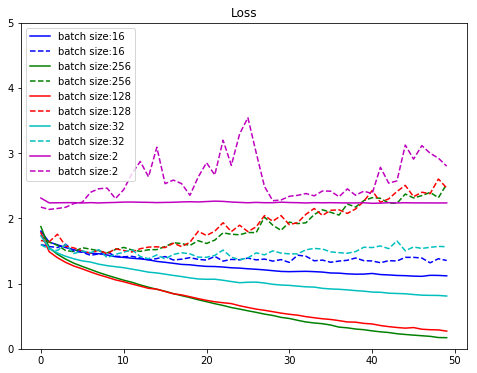

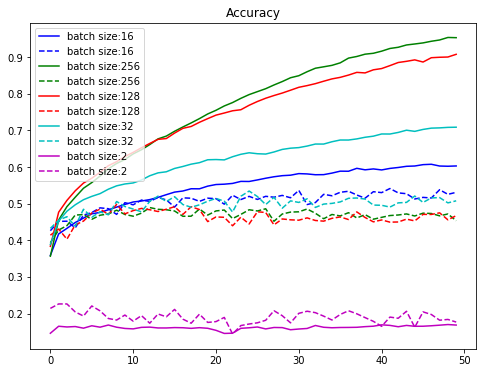

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["b", "g", "r", "c", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE_ = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZE_:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    #print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "batch size:{}".format(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 103s 2ms/step - loss: 2.2097 - acc: 0.1857 - val_loss: 3.9989 - val_acc: 0.2223
Epoch 50/50
50000/50000 [==============================] - 103s 2ms/step - loss: 2.2087 - acc: 0.1850 - val_loss: 3.8149 - val_acc: 0.2336
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 14s 290us/step - loss: 0.5817 - acc: 0.7924 - val_loss: 1.5763 - val_acc: 0.5414
Epoch 48/50
50000/50000 [==============================] - 15s 290us/step - loss: 0.5780 - acc: 0.7950 - val_loss: 1.5655 - val_acc: 0.5443
Epoch 49/50
50000/50000 [==============================] - 15s 290us/step - loss: 0.5659 - acc: 0.8001 - val_loss: 1.5555 - val_acc: 0.5439
Epoch 50/50
50000/50000 [==============================] - 14s 290us/step - loss: 0.5659 - acc: 0.7983 - val_loss: 1.5497 - val_acc: 0.5420
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1

50000/50000 [==============================] - 7s 145us/step - loss: 0.3076 - acc: 0.8905 - val_loss: 2.0105 - val_acc: 0.5391
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.2869 - acc: 0.8986 - val_loss: 2.0623 - val_acc: 0.5342
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2850 - acc: 0.8986 - val_loss: 2.0896 - val_acc: 0.5386
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2814 - acc: 0.9001 - val_loss: 2.0720 - val_acc: 0.5436
Epoch 49/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2732 - acc: 0.9036 - val_loss: 2.0822 - val_acc: 0.5369
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2686 - acc: 0.9052 - val_loss: 2.0748 - val_acc: 0.5350
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)     

Epoch 44/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.0807 - acc: 0.9753 - val_loss: 2.5068 - val_acc: 0.5166
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.0662 - acc: 0.9809 - val_loss: 2.5606 - val_acc: 0.5171
Epoch 46/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.0643 - acc: 0.9814 - val_loss: 2.5694 - val_acc: 0.5178
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.0608 - acc: 0.9824 - val_loss: 2.6035 - val_acc: 0.5214
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.0645 - acc: 0.9810 - val_loss: 2.5896 - val_acc: 0.5200
Epoch 49/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.0629 - acc: 0.9816 - val_loss: 2.6479 - val_acc: 0.5217
Epoch 50/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.0552 - acc: 0.9850 - val_loss: 2.6181 - val_acc: 0.5215
__________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0632 - acc: 0.9893 - val_loss: 2.4668 - val_acc: 0.5013
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0560 - acc: 0.9907 - val_loss: 2.4756 - val_acc: 0.5023
Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0473 - acc: 0.9931 - val_loss: 2.4944 - val_acc: 0.5050
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.0500 - acc: 0.9919 - val_loss: 2.5236 - val_acc: 0.5069
Epoch 47/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0474 - acc: 0.9929 - val_loss: 2.5345 - val_acc: 0.5069
Epoch 48/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0368 - acc: 0.9960 - val_loss: 2.5778 - val_acc: 0.5054
Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.0364 - acc: 0.9951 - val_loss: 2.5760 - val_acc: 0.5033
Epoch 50/50
50000/50000 [=========

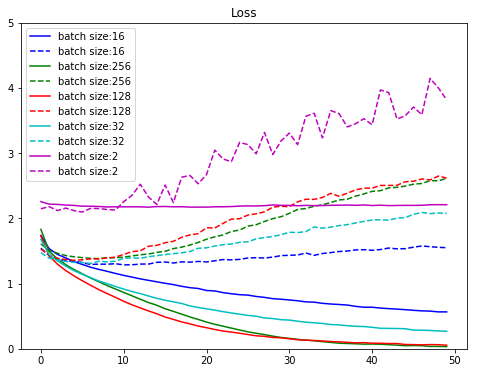

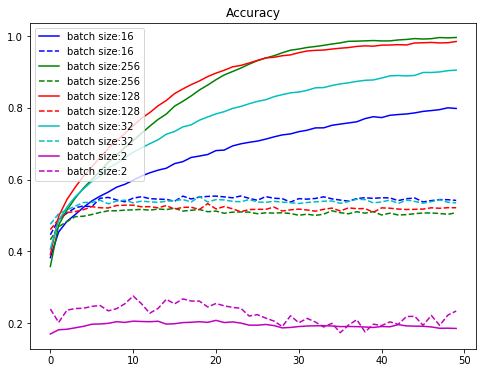

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["b", "g", "r", "c", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()